In [1]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [2]:
mnist = input_data.read_data_sets('/home/wangziwei/深度学习/PPT', one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/wangziwei/深度学习/PPT/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /home/wangziwei/深度学习/PPT/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting /home/wangziwei/深度学习/PPT/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting /home/wangziwei/深度学习/PPT/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Plea

In [3]:
mnist.train.images.shape

(55000, 784)

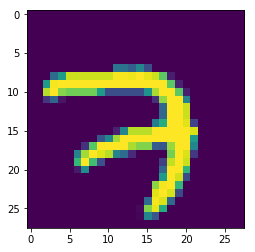

In [6]:
plt.imshow((mnist.train.images[0] * 255).astype(np.uint8).reshape([28, 28]))

In [7]:
mnist.train.labels[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [8]:
batch_images, batch_labels = mnist.train.next_batch(32)

In [9]:
batch_images.shape

(32, 784)

In [19]:
with tf.Graph().as_default() as g:
    inputs = tf.placeholder(shape = [None, 784], dtype = tf.float32)
    labels = tf.placeholder(shape = [None, 10], dtype = tf.float32)
    
    
    
    out_weight = tf.Variable(tf.random_normal([784, 10]))
    out_bias = tf.Variable(tf.zeros([10, ]))
    logits = tf.matmul(inputs, out_weight) + out_bias
    output = tf.nn.softmax(logits)   #shape([None, 10])
    
    loss = tf.reduce_mean(-tf.reduce_sum(labels * tf.log(output + 1e-17), axis = 1))
    acc = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output, axis = 1), tf.argmax(labels, axis = 1)), tf.float32))
    
    optim = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
    train_op = optim.minimize(loss)

In [21]:
#训练模型
with tf.Session(graph = g) as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(10000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss, _ = sess.run([loss, train_op], feed_dict = {inputs: batch_images, labels: batch_labels})
        if i % 500 == 0:
            accs = []
            for j in range(10000 // 32):
                batch_images, batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc, feed_dict = {inputs: batch_images, labels: batch_labels})
                accs.append(res_acc)
            m_acc = np.mean(accs)
            print('loss %2.4f, acc %2.2f%%' % (res_loss, m_acc * 100))

loss 16.2287, acc 8.42%
loss 3.8522, acc 26.47%
loss 4.1088, acc 43.01%
loss 1.3275, acc 54.06%
loss 2.6764, acc 60.65%
loss 1.9308, acc 64.12%
loss 2.3380, acc 67.22%
loss 0.9899, acc 69.44%
loss 0.6410, acc 71.46%
loss 1.6618, acc 72.98%
loss 2.2010, acc 74.31%
loss 1.7055, acc 75.48%
loss 1.0555, acc 76.52%
loss 0.6386, acc 77.37%
loss 0.9667, acc 78.11%
loss 0.9370, acc 78.67%
loss 1.3488, acc 79.36%
loss 0.6598, acc 79.72%
loss 0.4963, acc 80.40%
loss 0.7903, acc 80.89%


In [ ]:
tf.keras.losses.binary_crossentropy